In [21]:
import cobra
import pandas as pd
import re
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../code/')
import leakage, utils
import seaborn as sns
from matplotlib import cm, colors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib
import statsmodels.api as sm

# Read files, define colormap etc

In [22]:
# df = pd.read_csv('spreadsheet_ecoli_leakage_and_info_230626_owd_significant.csv', index_col = 0)
only_significant_changes = False
timepoints = np.arange(1.5, 17, 1)
knock_outs = False
shadow_price_for_leaked_mets = True


#################
if only_significant_changes:
    s1 = '_osc'
else:
    s1 = ''

if shadow_price_for_leaked_mets:
    s2 = '_SP_for_leaked'
else:
    s2 = ''

if knock_outs:
    s3 = '_KO'
else:
    s3 = ''
    

species = 'b_licheniformis'
timestr = '20230704'
fn = 'spreadsheet_{0}_leakage_{1}{2}{3}{4}.csv'.format(species, timestr, s1, s2, s3)
folder = Path('../../results/{0}/'.format(species))

df = pd.read_csv(folder / fn, index_col = 0)

In [23]:
# df['log10(Leakage [mmol/gDW/h])'] = df['log10(leakage)']
df['Shadow price [gDW/mmol]'] = df['Shadow price']
df['Topological Polar Surface Area [Å]'] = df['Topological Polar Surface Area []']
# df['log10(-Shadow price [gDW/mmol])'] = df['log10(-Shadow price)']
# df['log10(Turnover [mmol/gDW/h])'] = df['log10(Turnover)']

In [24]:
cmap40 = colors.ListedColormap(cm.tab20b.colors[4:] + cm.tab20c.colors, name='tab40')
cmap40(34)

(0.7411764705882353, 0.7411764705882353, 0.7411764705882353, 1.0)

In [25]:
df

,Metabolite name,Metabolite id,Mass,Charge,Phosphate,Topological Polar Surface Area [],Concentration,log P,Leakage (mmol/gDW/h),Time,...,Turnover,Median log10(-Shadow price),Low log10(-Shadow price),High log10(-Shadow price),Uptake (mmol/gDW/h),log10(Leakage [mmol/gDW/h]),log10(-Shadow price [gDW/mmol]),log10(Turnover [mmol/gDW/h]),Shadow price [gDW/mmol],Topological Polar Surface Area [Å]
0,Dihydroxyacetonephosphate,dhap,168.041961,-2.0,1,104.0,0.000374,-2.5,0.001493,1.5,...,0.759988,-1.319686,-1.358529,-1.625241,0.000000,-2.825896,-1.328759,-0.119193,-0.046907,104.0
1,Glyceraldehyde-3-phosphate,g3p,168.041961,-2.0,1,104.0,NaN,-2.7,0.000176,1.5,...,1.494194,-1.319686,-1.358530,-1.625242,0.000000,-3.755548,-1.328759,0.174407,-0.046907,104.0
2,2/3-phosphoglycerate,"2pg, 3pg",183.033421,-3.0,1,124.0,0.001540,-2.6,0.004842,1.5,...,0.982294,-1.405116,-1.458059,-1.744730,0.000000,-2.314933,-1.414189,-0.007759,-0.038531,124.0
3,Phosphoenolpyruvate,pep,165.018141,-3.0,1,104.0,0.000184,-1.1,0.002034,1.5,...,0.493572,-1.405116,-1.459421,-1.722097,0.000000,-2.691596,-1.414189,-0.306649,-0.038531,104.0
4,Pyruvate,pyr,87.054120,-1.0,0,57.2,NaN,-0.6,0.089897,1.5,...,3.133064,-1.479809,-1.537968,-1.850228,0.000000,-1.046254,-1.485883,0.495969,-0.032668,57.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Arginine,arg__L,175.208900,1.0,0,128.0,0.000569,-4.2,NaN,15.5,...,NaN,-1.037566,-1.035788,-0.870056,0.000035,NaN,NaN,NaN,NaN,128.0
22,Histidine,his__L,155.154560,0.0,0,92.0,0.000068,-3.2,0.000673,15.5,...,0.001518,-0.999084,-0.980364,-0.893023,0.000000,-3.172105,-0.985088,-2.818769,-0.103493,92.0
23,Acetate,ac,59.044020,-1.0,0,40.1,NaN,0.4,NaN,15.5,...,NaN,-1.619471,-1.714952,-2.053283,1.747695,NaN,NaN,NaN,NaN,40.1
24,Orotate,orot,155.088320,-1.0,0,98.3,NaN,-0.8,NaN,15.5,...,NaN,-1.282544,-1.268313,-1.037221,0.000640,NaN,NaN,NaN,NaN,98.3


# Scatterplots and time-traces of specific parameters
- Shadow price
- log10(-Shadow price) is [gDW/mM]
- Turnover
- log P?
- Charge?


In [27]:
hours = [1.5, 2.5, 3.5,4.5,5.5,7.5,8.5]
# hours = [6.5]

In [28]:
df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Time', 'Glucose', 'Predicted growth rate',
       'Shadow price', 'Turnover', 'Median log10(-Shadow price)',
       'Low log10(-Shadow price)', 'High log10(-Shadow price)',
       'Uptake (mmol/gDW/h)', 'log10(Leakage [mmol/gDW/h])',
       'log10(-Shadow price [gDW/mmol])', 'log10(Turnover [mmol/gDW/h])',
       'Shadow price [gDW/mmol]', 'Topological Polar Surface Area [Å]'],
      dtype='object')

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_34851/54883470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace = True)


LinAlgError: SVD did not converge

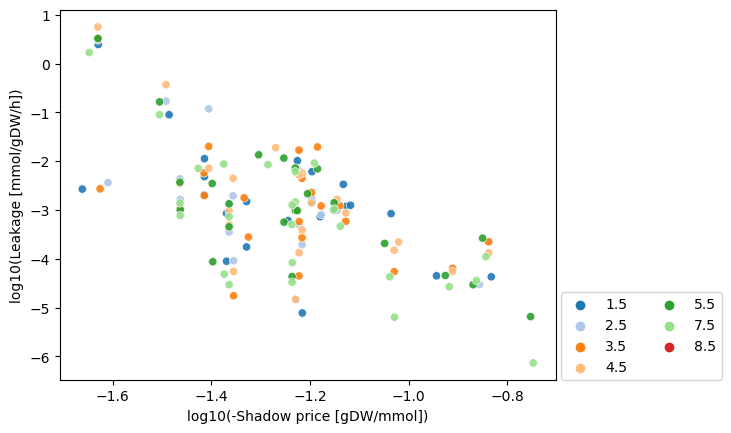

In [29]:
# sns.scatterplot(data = df, x = 'Shadow price', y = 'log10(Leakage [mmol/gDW/h])', hue = 'Time', palette = 'tab20', alpha = 0.9)
# sns.scatterplot(data = df.loc[df.Time.isin(hours),:], x = 'log10(-Shadow price [gDW/mmol])', y = 'log10(Leakage [mmol/gDW/h])', hue = 'Time', palette = 'tab20', alpha = 0.9)
sns.scatterplot(data = df.loc[df.Time.isin(hours),:], x = 'log10(-Shadow price [gDW/mmol])', y = 'log10(Leakage [mmol/gDW/h])', hue = 'Time', palette = 'tab20', alpha = 0.9)
plt.legend(ncol = 2, loc = (1.01, 0))

tmp = df.loc[df.Time.isin(hours),:]
tmp.dropna(inplace = True)
X = sm.add_constant(tmp['log10(-Shadow price [gDW/mmol])'])
smodel = sm.OLS(tmp['log10(Leakage [mmol/gDW/h])'],X)
res = smodel.fit()

In [30]:
np.corrcoef(tmp['log10(-Shadow price [gDW/mmol])'], tmp['log10(Leakage [mmol/gDW/h])'])
tmp.corr()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_34851/3673844402.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp.corr()


,Mass,Charge,Phosphate,Topological Polar Surface Area [],Concentration,log P,Leakage (mmol/gDW/h),Time,Glucose,Predicted growth rate,...,Turnover,Median log10(-Shadow price),Low log10(-Shadow price),High log10(-Shadow price),Uptake (mmol/gDW/h),log10(Leakage [mmol/gDW/h]),log10(-Shadow price [gDW/mmol]),log10(Turnover [mmol/gDW/h]),Shadow price [gDW/mmol],Topological Polar Surface Area [Å]
Mass,1.000000,-0.404457,0.507752,0.688637,-0.124381,0.008119,-0.254176,0.123478,0.054860,-0.031987,...,0.074275,0.185354,0.259507,0.177213,NaN,-0.155126,0.217168,-0.013853,-0.109518,0.688637
Charge,-0.404457,1.000000,-0.710813,-0.652272,0.057811,-0.361268,-0.189470,0.042978,-0.119814,-0.111656,...,-0.340925,0.634768,0.665908,0.698081,NaN,-0.530930,0.674658,-0.652036,-0.446928,-0.652272
Phosphate,0.507752,-0.710813,1.000000,0.499778,-0.185511,-0.138991,-0.124951,-0.069709,0.129385,0.100349,...,0.422212,-0.516661,-0.487721,-0.537854,NaN,0.294092,-0.511381,0.470616,0.335181,0.499778
Topological Polar Surface Area [],0.688637,-0.652272,0.499778,1.000000,0.029761,-0.068692,0.047901,-0.001515,0.045464,0.017407,...,0.162387,-0.328974,-0.334444,-0.374514,NaN,0.258463,-0.309339,0.357760,0.270970,1.000000
Concentration,-0.124381,0.057811,-0.185511,0.029761,1.000000,-0.341758,0.381785,-0.038482,0.140915,0.168979,...,0.002398,-0.101286,-0.061376,-0.086279,NaN,0.240864,-0.035958,0.076162,0.015034,0.029761
log P,0.008119,-0.361268,-0.138991,-0.068692,-0.341758,1.000000,0.038890,0.083136,-0.032492,-0.045729,...,0.007346,0.077972,0.036014,0.065270,NaN,0.023067,0.002827,0.119345,-0.033709,-0.068692
Leakage (mmol/gDW/h),-0.254176,-0.189470,-0.124951,0.047901,0.381785,0.038890,1.000000,-0.137916,0.106192,0.180830,...,0.082929,-0.383545,-0.362119,-0.385762,NaN,0.668456,-0.333592,0.401625,0.181271,0.047901
Time,0.123478,0.042978,-0.069709,-0.001515,-0.038482,0.083136,-0.137916,1.000000,0.312545,-0.098276,...,0.129953,0.256285,0.179522,0.177195,NaN,-0.274048,0.097475,0.224430,0.252953,-0.001515
Glucose,0.054860,-0.119814,0.129385,0.045464,0.140915,-0.032492,0.106192,0.312545,1.000000,0.799174,...,0.203948,-0.327962,-0.076775,-0.089398,NaN,0.044691,-0.106366,0.378822,0.050647,0.045464
Predicted growth rate,-0.031987,-0.111656,0.100349,0.017407,0.168979,-0.045729,0.180830,-0.098276,0.799174,1.000000,...,0.147438,-0.382072,-0.138728,-0.143388,NaN,0.163319,-0.104920,0.299456,-0.311026,0.017407


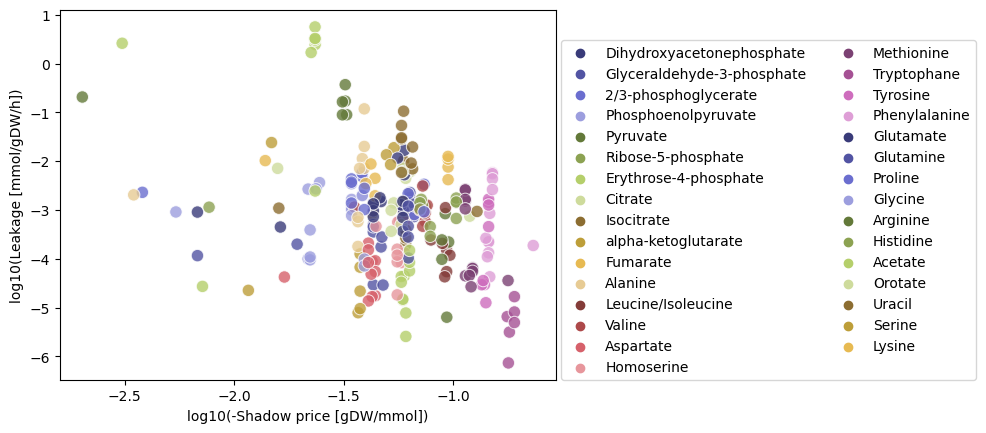

In [31]:
ax = sns.scatterplot(data = df, x = 'log10(-Shadow price [gDW/mmol])', y = 'log10(Leakage [mmol/gDW/h])', 
                     hue = 'Metabolite name', alpha = 0.8, palette = 'tab20b', s = 80) # .loc[df.Time.isin([5.5, 6.5, 7.5, 8.5]),:]
ax.legend(ncol = 2, loc = (1.01, 0))


In [44]:
df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Time', 'Glucose', 'Predicted growth rate',
       'Shadow price', 'Turnover', 'Median log10(-Shadow price)',
       'Low log10(-Shadow price)', 'High log10(-Shadow price)',
       'Uptake (mmol/gDW/h)', 'log10(Leakage [mmol/gDW/h])',
       'log10(-Shadow price [gDW/mmol])', 'log10(Turnover [mmol/gDW/h])',
       'Shadow price [gDW/mmol]', 'Topological Polar Surface Area [Å]'],
      dtype='object')

Text(0, 0.5, 'log10(Leakage [mmol/gDW/h])')

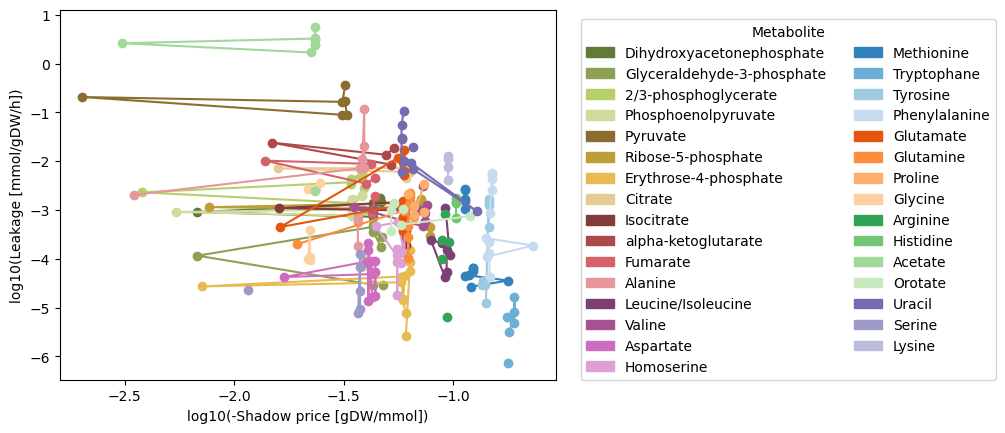

In [32]:
fig, ax = plt.subplots(1)
hours = np.arange(1.5,15,1)
x = 'log10(-Shadow price [gDW/mmol])'
y = 'log10(Leakage [mmol/gDW/h])'
# corr = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()

for j, m in enumerate(mnames):
    dfm = df.loc[df['Metabolite name']==m,:]
    ax.plot(dfm[x], dfm[y], c = cmap40(j), marker = 'o')
    # ax.scatter(dfm[x], dfm[y], c = cmap40(j))
    # print(dfm)

patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
l1 = plt.legend(handles=patches, ncol = 2, loc = (1.05,0), title = 'Metabolite')

plt.xlabel(x)
plt.ylabel(y)

In [33]:
df['Predicted growth rate'].unique()

array([0.04752656, 0.45938993, 0.48408993, 0.47200623, 0.29003773,
       0.60645117, 0.34896277, 0.        , 0.04142951, 0.0065583 ,
       0.02188386, 0.0328058 , 0.01597654])

In [39]:
df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Time', 'Glucose', 'Predicted growth rate',
       'Shadow price', 'Turnover', 'Median log10(-Shadow price)',
       'Low log10(-Shadow price)', 'High log10(-Shadow price)',
       'Uptake (mmol/gDW/h)', 'log10(Leakage [mmol/gDW/h])',
       'log10(-Shadow price [gDW/mmol])', 'log10(Turnover [mmol/gDW/h])',
       'Shadow price [gDW/mmol]', 'Topological Polar Surface Area [Å]'],
      dtype='object')

2.5 Citrate
2.5 alpha-ketoglutarate
2.5 Leucine/Isoleucine
2.5 Valine
2.5 Tryptophane
2.5 Serine
2.5 Arginine
2.5 Histidine
2.5 Uracil
3.5 Pyruvate
3.5 alpha-ketoglutarate
3.5 Fumarate
3.5 Tryptophane
3.5 Tyrosine
3.5 Serine
3.5 Arginine
3.5 Histidine
3.5 Orotate
4.5 Lysine
4.5 Tryptophane
4.5 Tyrosine
4.5 Proline
4.5 Serine
4.5 Glycine
4.5 Histidine
4.5 Uracil
5.5 Alanine
5.5 Lysine
5.5 Serine
5.5 Glycine
5.5 Arginine
5.5 Histidine
5.5 Orotate
6.5 Lysine
6.5 Tryptophane
6.5 Tyrosine
6.5 Proline
6.5 Glycine
6.5 Arginine
6.5 Histidine
7.5 Lysine
7.5 Glutamine
7.5 Proline
7.5 Serine
7.5 Glycine
7.5 Histidine


Text(0.99, 0.9, 'Spearman ρ = -0.54, p-value = 7.92e-12')

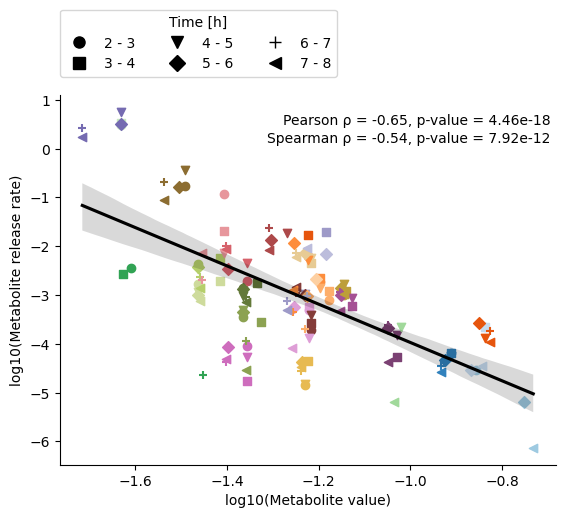

In [56]:
fig, ax = plt.subplots(1)
hours = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
# x = 'Shadow price [gDW/mmol]'
x = 'log10(-Shadow price [gDW/mmol])'
y = 'log10(Leakage [mmol/gDW/h])'
symbols = ['o', 's', 'v', 'D', '+', '<', '>']
hours_string = ['2 - 3','3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8']
corr = []
all_xy = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()
for i, t in enumerate(hours):
    
    if t==6.5:
        x = 'Low log10(-Shadow price)'
    x_arr = df.loc[df.Time==t, x]
    y_arr = df.loc[df.Time==t, y]
    l_arr = df.loc[df.Time==t, 'Metabolite name']
    xy_corr = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xy_corr.append([xj,yj])
            ax.scatter(xj, yj, marker = symbols[i], color = cmap40(j), label = l_arr[j])
        else:
            print(t, l_arr[j])
    all_xy += xy_corr
    corr.append(st.pearsonr([x[0] for x in xy_corr],[x[1] for x in xy_corr]))
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          markersize=8, label=t) for m,t in zip(symbols, hours_string)]
l1 = plt.legend(handles=patches, ncol = 2, loc = (1.05,0), title = 'Metabolite')
plt.legend(handles=patches2, ncol = 3, loc = (0,1.05), title = 'Time [h]')
plt.gca().add_artist(l1)

# all_x_arr = df.loc[df.Time.isin(hours), x]
# all_y_arr = df.loc[df.Time.isin(hours), y]
all_x_arr = pd.Series([x[0] for x in all_xy])
all_y_arr = pd.Series([x[1] for x in all_xy])
sns.regplot(x=all_x_arr, y = all_y_arr, ax = ax, scatter = False, color = 'k', ci = 95)
plt.xlabel('log10(Metabolite value)')
plt.ylabel('log10(Metabolite release rate)')
sns.despine()
prho, ppval = st.pearsonr([x[0] for x in all_xy],[x[1] for x in all_xy])
srho, spval = st.spearmanr([x[0] for x in all_xy],[x[1] for x in all_xy])

ax.text(0.99, 0.95, 'Pearson ρ = {0:.2f}, p-value = {1:.2e}'.format(prho, ppval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)
ax.text(0.99, 0.9, 'Spearman ρ = {0:.2f}, p-value = {1:.2e}'.format(srho, spval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)
# plt.tight_layout()

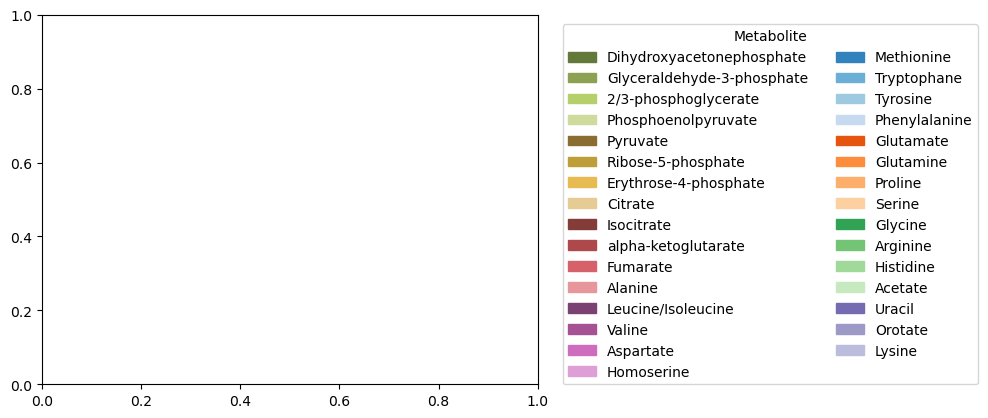

In [52]:
plt.legend(handles=patches, ncol = 2, loc = (1.05,0), title = 'Metabolite')

# Correlations between lekage rates and chosen parameters

1.5 alpha-ketoglutarate 9 nan -inf
1.5 Leucine/Isoleucine 12 nan nan
1.5 Tryptophane 17 nan nan
1.5 Tyrosine 18 nan nan
1.5 Glutamate 20 nan nan
1.5 Histidine 25 nan nan
1.5 Orotate 27 nan nan
2.5 Citrate 7 nan nan
2.5 alpha-ketoglutarate 9 nan -inf
2.5 Leucine/Isoleucine 12 nan nan
2.5 Valine 13 nan nan
2.5 Tryptophane 17 nan nan
2.5 Serine 23 nan nan
2.5 Arginine 25 nan nan
2.5 Histidine 26 nan nan
2.5 Uracil 28 nan nan
3.5 Pyruvate 4 nan nan
3.5 alpha-ketoglutarate 9 nan -inf
3.5 Fumarate 10 nan nan
3.5 Tryptophane 17 nan nan
3.5 Tyrosine 18 nan nan
3.5 Serine 23 nan nan
3.5 Arginine 25 nan nan
3.5 Histidine 26 nan nan
3.5 Orotate 28 nan nan


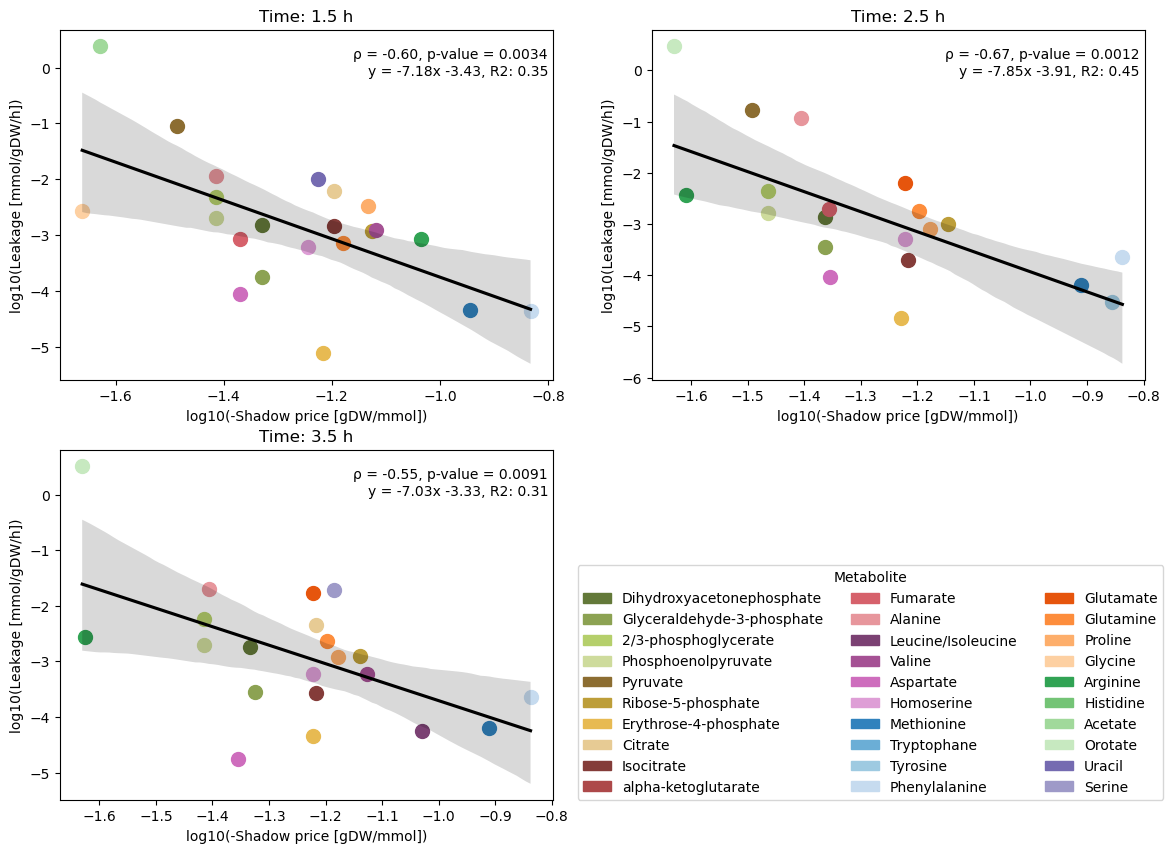

In [250]:
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax3 = fig.add_subplot(gs[1, 0]) # row 1, span all columns

axes = [ax1,ax2,ax3]
# fig, axes = plt.subplots(2,2, )
# axes = axes.flatten()
hours = np.array([5.5, 6.5, 7.5])-4
# x = 'log10(Turnover)'
x = 'log10(-Shadow price [gDW/mmol])'
y = 'log10(Leakage [mmol/gDW/h])'
symbols = ['o', 's', 'v', 'D']
corr = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()
for i, t in enumerate(hours):
    x_arr = df.loc[df.Time==t, x]
    y_arr = df.loc[df.Time==t, y]
    l_arr = df.loc[df.Time==t, 'Metabolite name']
    xc = []
    yc = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xc.append(xj)
            yc.append(yj)
            axes[i].scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
        else:
            print(t, l_arr[j],j, xj, yj)
    rho, pval = st.pearsonr(xc,yc)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes)
    axes[i].set_title('Time: {0} h'.format(t))
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    sns.regplot(x=x_arr, y = y_arr, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, 'y = {0:.2f}x {1:0.2f}, R2: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes)
    
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = plt.legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.legend(handles=patches2, ncol = 23, loc = (0,1.05), title = 'Time [h]')
# plt.gca().add_artist(l1)

# plt.xlabel(x)
# plt.ylabel(y)
# plt.tight_layout()

4.5 Lysine 17 nan -inf
4.5 Tryptophane 18 nan nan
4.5 Tyrosine 19 nan nan
4.5 Proline 23 nan nan
4.5 Serine 24 nan nan
4.5 Glycine 25 nan nan
4.5 Histidine 27 nan nan
4.5 Uracil 30 nan nan
5.5 Alanine 11 nan nan
5.5 Lysine 17 nan -inf
5.5 Serine 24 nan nan
5.5 Glycine 25 nan nan
5.5 Arginine 26 nan nan
5.5 Histidine 27 nan nan
5.5 Orotate 29 nan nan
6.5 Lysine 17 nan -inf
6.5 Tryptophane 18 nan nan
6.5 Tyrosine 19 nan nan
6.5 Proline 23 nan nan
6.5 Glycine 25 nan nan
6.5 Arginine 26 nan nan
6.5 Histidine 27 nan nan


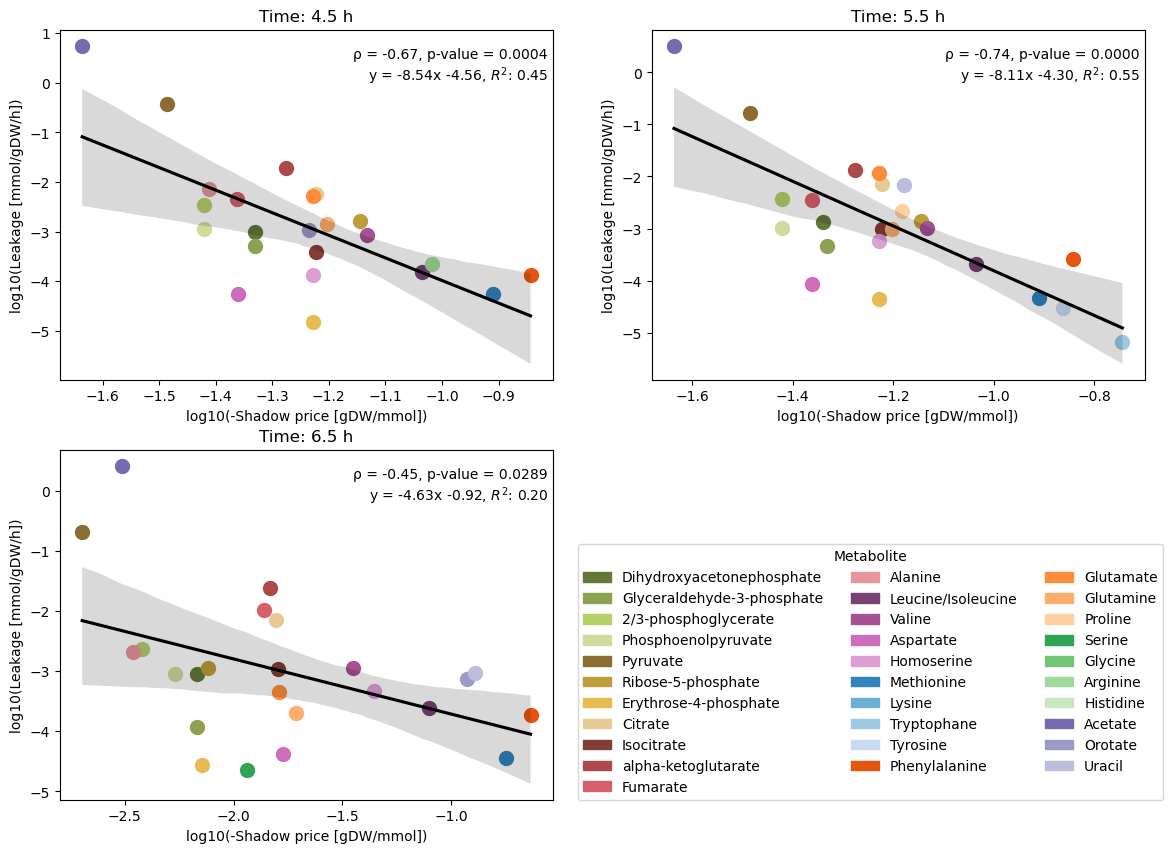

In [177]:
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax3 = fig.add_subplot(gs[1, 0]) # row 1, span all columns
axes = [ax1,ax2,ax3]
# fig, axes = plt.subplots(2,2, )
# axes = axes.flatten()
hours = np.array([6.5, 7.5, 8.5])-2
# x = 'Shadow price [gDW/mmol]'
# x = 'Charge'
# x = 'log10(Turnover)'
# y = 'log10(Leakage [mmol/gDW/h])'
y = ''
symbols = ['o', 's', 'v', 'D']
corr = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()
for i, t in enumerate(hours):
    x_arr = df.loc[df.Time==t, x]
    y_arr = df.loc[df.Time==t, y]
    l_arr = df.loc[df.Time==t, 'Metabolite name']
    xc = []
    yc = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xc.append(xj)
            yc.append(yj)
            axes[i].scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
        else:
            print(t, l_arr[j], j, xj, yj)
    rho, pval = st.pearsonr(xc,yc)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes)
    axes[i].set_title('Time: {0} h'.format(t))
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    sns.regplot(x=x_arr, y = y_arr, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, 'y = {0:.2f}x {1:0.2f}, $R^2$: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes)
    
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = plt.legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.legend(handles=patches2, ncol = 23, loc = (0,1.05), title = 'Time [h]')
# plt.gca().add_artist(l1)

# plt.xlabel(x)
# plt.ylabel(y)
# plt.tight_layout()

# All correlations

In [237]:
cols_for_corr = ['Mass',
       'Charge', 'Phosphate', 'Topological Polar Surface Area [Å]',
       # 'Shadow price [gDW/mmol]',
                 'log10(-Shadow price [gDW/mmol])',
       'log10(Turnover [mmol/gDW/h])', 'log P']


## "timecourse" for correlations for all parameters

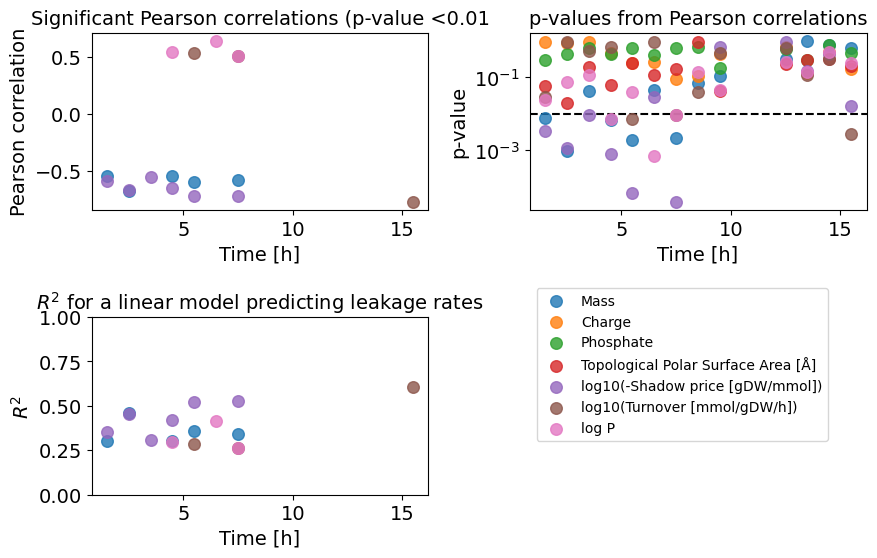

In [239]:
# Create 2x2 sub plots
fig, axes = plt.subplots(2,2, figsize = (10,6))
[ax1,ax2,ax3, ax4] = axes.flatten()
hours = df.Time.unique()
y = 'log10(Leakage [mmol/gDW/h])'
p_val_lim = 0.01
for i, c in enumerate(cols_for_corr):
    corr = []
    pvals = np.zeros(len(hours))
    rhos = np.zeros(len(hours))
    r2s = np.zeros(len(hours))
    for k, h in enumerate(hours):
        dft = df.loc[df.Time==h, [c, y]]
        x_arr = dft[c]
        y_arr = dft[y]
        
        xc = []
        yc = []
        for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
            if np.isfinite(yj) and np.isfinite(xj):
                xc.append(xj)
                yc.append(yj)
        if len(xc)<2:
            rhos[k] = np.nan
            r2s[k] = np.nan
            pvals[k] = np.nan
            continue
            
        rho, pvals[k] = st.pearsonr(xc,yc)
        X = sm.add_constant(xc)
        model = sm.OLS(yc, X)
        res = model.fit()
        
        if pvals[k] < p_val_lim:
            rhos[k] = rho
            r2s[k] = res.rsquared
        else:
            rhos[k] = np.nan
            r2s[k] = np.nan
            
            
    ax1.scatter(hours, rhos, label = c, s = 70, alpha = 0.8)
    ax2.scatter(hours, pvals,label = c, s = 70, alpha = 0.8)
    ax3.scatter(hours, r2s, label = c, s = 70, alpha = 0.8)
    
ax2.axhline(p_val_lim, c = 'k', ls = '--', zorder = -1)
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Time [h]', fontdict = {'size':14})
    ax.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylabel('Pearson correlation', fontdict = {'size':14})
ax2.set_yscale('log')
ax2.set_ylabel('p-value', fontdict = {'size':14})
ax3.set_ylabel('$R^2$', fontdict = {'size':14})
ax3.set_ylim(0,1)
ax2.legend(loc='upper left', bbox_to_anchor=(0., -0.4), ncol = 1)
ax2.set_title('p-values from Pearson correlations', fontdict = {'size':14})
ax1.set_title('Significant Pearson correlations (p-value <{0}'.format(p_val_lim), fontdict = {'size':14})
ax3.set_title('$R^2$ for a linear model predicting leakage rates', fontdict = {'size':14})
ax4.set_axis_off()

plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
# patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# # patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
#                           # markersize=8, label=t) for m,t in zip(symbols, hours)]
# l1 = axes[N-1].legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.tight_layout()

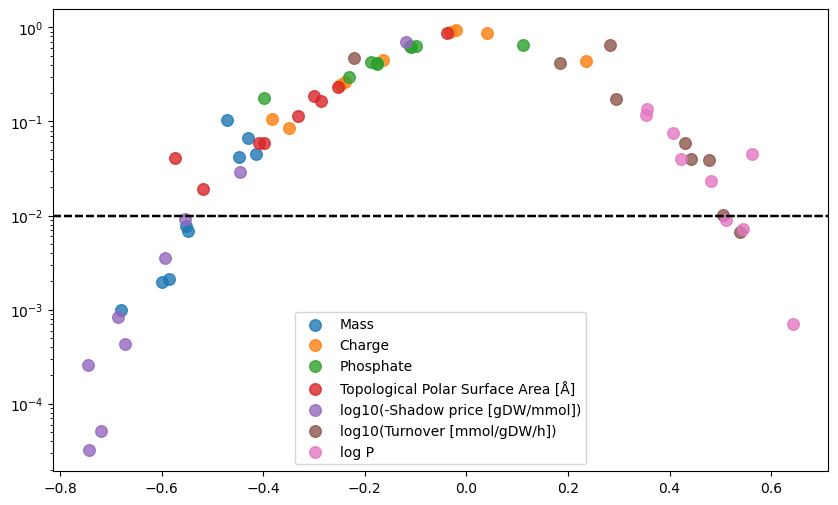

In [147]:
# Create 2x2 sub plots
fig, ax1 = plt.subplots(1,1, figsize = (10,6))
# [ax1,ax2,ax3, ax4] = axes.flatten()
hours = df.Time.unique()
y = 'log10(Leakage [mmol/gDW/h])'
p_val_lim = 0.01
for i, c in enumerate(cols_for_corr):
    corr = []
    pvals = np.zeros(len(hours))
    rhos = np.zeros(len(hours))
    r2s = np.zeros(len(hours))
    for k, h in enumerate(hours):
        dft = df.loc[df.Time==h, [c, y]]
        x_arr = dft[c]
        y_arr = dft[y]
        
        xc = []
        yc = []
        for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
            if np.isfinite(yj) and np.isfinite(xj):
                xc.append(xj)
                yc.append(yj)
                
        rho, pvals[k] = st.pearsonr(xc,yc)
        rhos[k] = rho
        # X = sm.add_constant(xc)
        # model = sm.OLS(yc, X)
        # res = model.fit()
    ax1.scatter(rhos, pvals,label = c, s = 70, alpha = 0.8)
    ax1.set_yscale('log')
    ax1.axhline(0.01, c = 'k', ls = '--')
    plt.legend()

In [80]:
df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Time', 'Glucose', 'Predicted growth rate',
       'Shadow price', 'Turnover', 'Uptake (mmol/gDW/h)',
       'log10(Leakage [mmol/gDW/h])', 'log10(-Shadow price [gDW/mmol])',
       'log10(Turnover [mmol/gDW/h])', 'Shadow price [gDW/mmol]',
       'Topological Polar Surface Area [Å]'],
      dtype='object')

In [ ]:
# Create 2x2 sub plots
N = len(cols_for_corr)
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize = (16, 12))
axes = []
l = 0 
for i in range(3):
    for j in range(3):
        if i*3+j >=N:
            break
        axes.append(fig.add_subplot(gs[i, j])) # row 0, col 0
dft = df.loc[df.Time==7.5, cols_for_corr+['Metabolite name', 'log10(Leakage [mmol/gDW/h])']]
# dft = dft0.loc[~dft0.isna().any(axis =1),:]
l_arr = dft['Metabolite name'].unique()
y_arr = dft['log10(Leakage [mmol/gDW/h])']

corr = []
for i, c in enumerate(cols_for_corr):
    ax = axes[i]
    x_arr = dft[c]
    xy_corr = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xy_corr.append([xj,yj])
        ax.scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
    xc = [x[0] for x in xy_corr]
    yc = [x[1] for x in xy_corr]
    # print(xc, yc)
    rho, pval = st.pearsonr(xc,yc)
    # rho, pval = st.pearsonr(x_arr, y_arr)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes,  fontdict={'size': 12})
    sns.regplot(x=xc, y = yc, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, r'y = {0:.2e}x {1:0.2e}, $R^2$: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes, fontdict={'size': 12})
    
    ax.set_xlabel(c,  fontdict={'size': 12})
    ax.set_ylabel('log10(leakage [mmol/gDW/h])',  fontdict={'size': 12})
    ax.tick_params(axis='both', which='major', labelsize=12)
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = axes[N-1].legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.tight_layout()

In [ ]:
# Create 2x2 sub plots
N = len(cols_for_corr)
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize = (16, 12))
axes = []
l = 0 
for i in range(3):
    for j in range(3):
        if i*3+j >=N:
            break
        axes.append(fig.add_subplot(gs[i, j])) # row 0, col 0
dft = df.loc[df.Time.isin([5.5, 6.5, 7.5, 8.5, 9.5, 10.5]), cols_for_corr+['Metabolite name', 'log10(leakage [mmol/gDW/h])']]
# dft = dft0.loc[~dft0.isna().any(axis =1),:]
l_arr = list(dft['Metabolite name'])
y_arr = dft['log10(leakage [mmol/gDW/h])']

corr = []
for i, c in enumerate(cols_for_corr):
    ax = axes[i]
    x_arr = dft[c]
    xy_corr = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xy_corr.append([xj,yj])
            # print(l_arr[j])
            ax.scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
    xc = [x[0] for x in xy_corr]
    yc = [x[1] for x in xy_corr]
    
    rho, pval = st.pearsonr(xc,yc)
    # rho, pval = st.pearsonr(x_arr, y_arr)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes)
    sns.regplot(x=x_arr, y = y_arr, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, r'y = {0:.2e}x {1:0.2e}, $R^2$: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes)
    
    ax.set_xlabel(c)
    ax.set_ylabel('log10(leakage [mmol/gDW/h])')
    
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = axes[N-1].legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.tight_layout()

In [ ]:
dfc = dft[cols_for_corr+['log10(Leakage [mmol/gDW/h])']]
# P = [organic]/[aqueous])

In [ ]:
rho = df.corr()
pval = df.corr(method=lambda x, y: st.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

# Get transporter info

In [ ]:
df_trans = pd.read_csv('e_coli_transporters.csv', index_col=0)

In [ ]:
df_trans.loc[df_trans.Membrane == 'inner',:]
dft = df.loc[df.Time.isin([5.5, 6.5, 7.5, 8.5, 9.5, 10.5]), cols_for_corr+['Metabolite name', 'log10(leakage [mmol/gDW/h])', 'Metabolite id']]
mIDs = dft['Metabolite id'].unique()

In [ ]:
idx = df_trans['iML1515 metabolite ID'].isin(mIDs)*(df_trans.Membrane == 'inner')
dfT = df_trans.loc[idx,:]

In [ ]:
# dfTT = dfT.loc[dfT.Direction.str.contains('Export'),:]

In [ ]:
dfT['Transport type'].unique()
other_lst = ['4abut antiporter', 'agm antiporter',
       'orn antiporter', 'pi antiporter', 'succ antiporter', 'ATP-binding cassette transporter']
dfT.loc[dfT['Transport type'].isin(other_lst), 'Transport type'] = 'Other'


In [ ]:
T_dict = {}
for mname in mIDs:
    tmp = dfT.loc[dfT['iML1515 metabolite ID'] == mname]
    if len(tmp)<3 and len(tmp)>0:
        T_dict[mname] = ", ".join(tmp['Transport type'].sort_values().unique())
    elif len(tmp)==0:
        T_dict[mname] = 'None'
    else:
        T_dict[mname] = 'Three or more different transporters'

In [ ]:
dft['Transporter'] = dft['Metabolite id'].map(T_dict)
dft.sort_values(by='Transporter', inplace = True)

In [ ]:
sns.boxplot(data = dft, x = 'log10(leakage [mmol/gDW/h])', y = 'Transporter')
# plt.legend(loc=(1.05,0))
plt.title('Estimated leakage rates grouped by annotated transporters')

# Plot a cumulative distribution of shadow prices


In [ ]:
model = cobra.io.read_sbml_model('../../models/e_coli/momentiJO1366.xml')
model.solver = 'gurobi'
# model.reactions.DHAPT.knock_out()
# model.reactions.THRA.knock_out()
# model.reactions.THRA2.knock_out()
# model.reactions.F6PA_TG_forward.knock_out()
# Speculations
# model.reactions.PFL.knock_out()
#I'm more and more conviced that PFL is not active in aerobic conditions
# https://doi.org/10.1016/j.jbc.2021.101423
model.reactions.EX_glc__D_e.lower_bound = -6
solution = cobra.flux_analysis.pfba(model)
print(model.summary(solution))

In [ ]:
sp = leakage.estimate_shadow_prices(model, delta=0.1)
# solution = model.optimize()
# sp = solution.shadow_prices

In [ ]:
Ssp = pd.Series(sp)

In [ ]:
solution = cobra.flux_analysis.pfba(model)
# solution = model.optimize()
turnover_dict = {}
for m in model.metabolites:
    if m.compartment == 'c':
        turnover_dict[m.id] = m.summary(solution).producing_flux['flux'].sum()

In [ ]:
sp_list = []
met_ids = []
for m in model.metabolites:
    # Remove non-organic compounds
    if m.id in ['hco3_c', 'co2_c']:
        continue
    if m.compartment == 'c':
        if 'C' in m.elements.keys():
            if m.formula_weight and (m.formula_weight < 500):
                if turnover_dict[m.id] >0:
                    if 'C' in m.elements.keys():
                        if sp[m.id] < 0:
                            met_ids.append(m.id)
                            sp_list.append(sp[m.id])

In [ ]:
selected_sp = pd.Series(sp_list, index = met_ids)
selected_sp.dropna(inplace = True)

In [ ]:
selected_sp.sort_values(inplace = True, ascending=False)

In [ ]:
model.metabolites.fdp_c

In [ ]:
max_leak = df.loc[:, ['Metabolite name','Metabolite id', 'log10(leakage [mmol/gDW/h])']].groupby('Metabolite name').max()
smax = max_leak['log10(leakage [mmol/gDW/h])'].max()
smin = max_leak['log10(leakage [mmol/gDW/h])'].min()

In [ ]:
max_leak.set_index('Metabolite id', inplace = True)

In [ ]:
selected_sp.index = [m[:-2] for m in selected_sp.index]

In [ ]:
# fig, [ax1, ax2] = plt.subplots(1,2, figsize = (16,6))
fig, ax = plt.subplots(1, figsize = (16,4))

norm = plt.Normalize(vmin=smin, vmax=smax)
#norm = matplotlib.colors.BoundaryNorm([0,1,2,3], cmap.N, extend='neither')
cmap = plt.cm.viridis
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

consumed_sp = []
produced_sp = []
both_sp = []
max_leak_dict = {}
for i, row in max_leak.iterrows():
    leak = row['log10(leakage [mmol/gDW/h])']
    met_ids = i.split(', ')
    for m_id in met_ids:
        try:
            met = selected_sp[m_id]
        except KeyError:
            print(m_id)
        else:
            max_leak_dict[m_id]=leak


for i, (m_id, sp_i) in enumerate(selected_sp.items()):
    try:
        leak_i = max_leak_dict[m_id]
    except KeyError:
        ax.plot([i+1,i+1], [0, -sp_i], c = 'k', alpha = 0.5, lw = 3) 
    else:
        ax.plot([i+1, i+1], [0, -sp_i], lw = 3, c = sm.to_rgba(leak_i))# colouring is wrong , lw = 2)#, cmap = cmap, norm = norm)


        
    
#     # # Make a seperate plot for the 10% least expensive
#     # if i < first_x:
    #     if leak_i > 0:
    #         ax2.scatter(i, sp_abs, s = 50, c = np.log(leak_i), cmap = cmap, norm = norm)
    #     else:
    #         ax2.scatter(i, sp_abs,s=10, c = 'k', alpha = 0.5)
    #     ax2.annotate(m_id[:-2], (i+0.5, sp_abs*0.9))

    
    
#ax.scatter(np.arange(len(selected_sp)), np.abs(selected_sp), s = 10)
ax.set_yscale('log')
#ax1.set_xlim(0,400)
# ax2.set_yscale('log')
# ax2.set_xlim(0, first_x+5)
ax.set_ylabel('-1 * Shadow price [gDW/mmol]', fontdict={'size':14})
# ax2.set_ylabel('-1 * Shadow price')
ax.set_xlabel('Rank', fontdict={'size':14})
# ax2.set_xlabel('Rank')
ax.set_xlim(0, i+2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.colorbar(sm, ax = ax, label = "Maximum log10-scaled leakage rates")
# plt.savefig('Rank of shadow price ecoli knock outs epsilon 001.png')

In [ ]:
st.ttest_ind(both_sp, consumed_sp, equal_var=False)

# Predict!

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, ARDRegression, BayesianRidge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [168]:
# dft = df.loc[df.Time.isin(np.arange(1.5, 9, 1)), :]
hours = [1.5, 2.5, 3.5,4.5,5.5,7.5,8.5] 
dft = df.loc[df.Time.isin(hours), :]


cols_for_corr = ['Mass',
       'Charge', 'Phosphate', 'Topological Polar Surface Area [Å]',
       # 'Shadow price [gDW/mmol]',
                 'log10(-Shadow price [gDW/mmol])',
       'log10(Turnover [mmol/gDW/h])', 'log P']

columns = cols_for_corr
# columns = ['Shadow price [gDW/mmol]', 'log10(Turnover [mmol/gDW/h])', 'log P']
# columns = ['log10(-Shadow price [gDW/mmol])', 'Mass', 'Charge', 'log P', 'Topological Polar Surface Area [Å]']
# columns = ['log10(-Shadow price [gDW/mmol])']
tmp = dft.loc[~dft['Leakage (mmol/gDW/h)'].isna(),columns+['log10(Leakage [mmol/gDW/h])', 'Metabolite name']]
# tmp['log10(Turnover [mmol/gDW/h])'].fillna(0, inplace = True) #tmp['log10(Turnover)']
tmp.dropna(inplace=True)
y = tmp['log10(Leakage [mmol/gDW/h])']
# X = tmp['Shadow price [gDW/mmol]']


In [153]:
# data = StandardScaler().fit_transform(tmp[columns])
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1)#, random_state=40)
#6.5

0.29782651494136847


Text(-3, -6, '$R^2$ LOO: 0.30, $R^2$: 0.58')

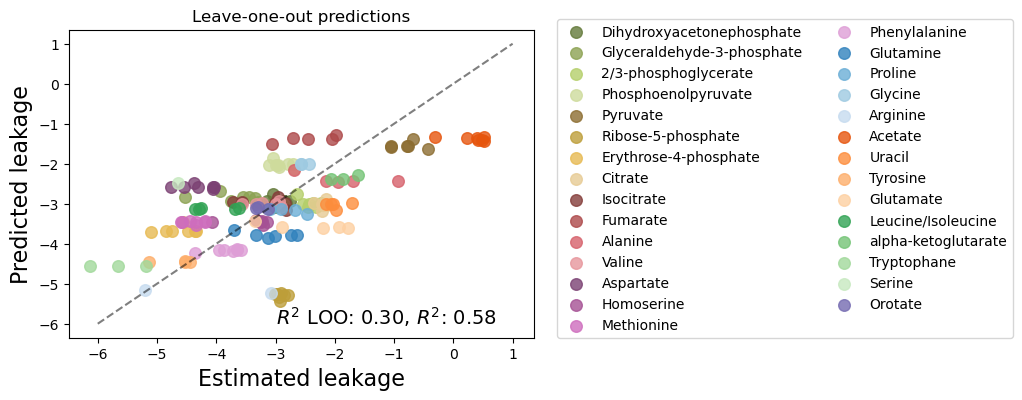

In [171]:
fig, ax = plt.subplots(1, figsize = (6, 4))
ypreds = []
yvals = []
mnames = tmp['Metabolite name'].unique()
for i, mname in enumerate(mnames):
    idx = tmp['Metabolite name']==mname
    linear_reg = LinearRegression(fit_intercept = True).fit(np.array(tmp.loc[~idx, columns]),y[~idx])
    Xi = np.array(tmp.loc[idx, columns])#reshape(1,-1)
    yi = linear_reg.predict(Xi)
    ypreds += list(yi)
    yvals += list(y[idx])
    ax.scatter(y[idx], yi, color = cmap40(i), label = mname,s = 70, alpha = 0.8)
# plt.scatter(ypreds, y)
l = np.linspace(-6,1)
plt.plot(l,l,c='k',ls = '--', alpha = 0.5)
plt.legend(ncol = 2, loc = (1.05, 0))
ypreds = np.array(ypreds)
yvals = np.array(yvals)

SSres = np.sum((ypreds-yvals)**2)
SStot = np.sum((yvals-np.mean(yvals))**2)
R2 = 1-(SSres/SStot)
print(R2)

X = sm.add_constant(np.array(tmp[columns]))
model = sm.OLS(y, X)
res = model.fit()

plt.xlabel('Estimated leakage', fontdict={'size': 16})
plt.ylabel('Predicted leakage', fontdict={'size': 16})
plt.title('Leave-one-out predictions')
plt.text(-3, -6, "$R^2$ LOO: {0:.2f}, $R^2$: {1:.2f}".format(R2, res.rsquared), fontdict={'size': 14})

In [172]:
all_sets = [list(x) for x in utils.powerset(cols_for_corr) if len(x)]

In [173]:
R2_arr = np.zeros(len(all_sets))
dft = df.loc[df.Time.isin(np.arange(1.5, 9, 1)), :]
R2_full = []
for j, cols in enumerate(all_sets):
    tmp = dft.loc[~dft['Leakage (mmol/gDW/h)'].isna(),cols+['log10(Leakage [mmol/gDW/h])', 'Metabolite name']]
    # tmp['log10(Turnover [mmol/gDW/h])'].fillna(0, inplace = True) #tmp['log10(Turnover)']
    tmp.replace([np.inf, -np.inf], np.nan, inplace=True)
    tmp.dropna(inplace=True)
    tmp.reset_index(inplace = True)
    y = tmp['log10(Leakage [mmol/gDW/h])']
    ypreds = []
    yvals = []
    mnames = tmp['Metabolite name'].unique()
    for i, mname in enumerate(mnames):
        idx = tmp['Metabolite name']==mname
        linear_reg = LinearRegression(fit_intercept = True).fit(np.array(tmp.loc[~idx, cols]),y[~idx])
        Xi = np.array(tmp.loc[idx, cols])#reshape(1,-1)
        yi = linear_reg.predict(Xi)
        ypreds += list(yi)
        yvals += list(y[idx])
        
    X = sm.add_constant(np.array(tmp[cols]))
    model = sm.OLS(y, X)
    res = model.fit()
    R2_full.append(res.rsquared)
       
    ypreds = np.array(ypreds)
    yvals = np.array(yvals)

    SSres = np.sum((ypreds-yvals)**2)
    SStot = np.sum((yvals-np.mean(yvals))**2)
    R2 = 1-(SSres/SStot)
    R2_arr[j] = R2
    
  


In [174]:
labels = []
lengths = []
for cols in all_sets:
    cols = list(cols)
    lengths.append(len(cols))
    if len(cols) > 1:
        n = ", ".join(cols)
        labels.append(n)
    else:
        labels.append(cols[0])
    
R2df = pd.DataFrame([labels, R2_arr, R2_full, lengths]).T
R2df.columns = ['Label', 'R2 LOO', 'R2', 'N params']

In [175]:
R2df.sort_values('R2 LOO', ascending=False, inplace=True)
R2df.head(12)

,Label,R2 LOO,R2,N params
7,"Mass, Charge",0.392375,0.54633,2
31,"Mass, Charge, log10(Turnover [mmol/gDW/h])",0.392163,0.560115,3
30,"Mass, Charge, log10(-Shadow price [gDW/mmol])",0.380108,0.54711,3
72,"Mass, Charge, log10(Turnover [mmol/gDW/h]), log P",0.3729,0.574484,4
71,"Mass, Charge, log10(-Shadow price [gDW/mmol]),...",0.372015,0.562874,4
32,"Mass, Charge, log P",0.370139,0.558249,3
70,"Mass, Charge, log10(-Shadow price [gDW/mmol]),...",0.36982,0.560225,4
107,"Mass, Charge, log10(-Shadow price [gDW/mmol]),...",0.36005,0.576377,5
68,"Mass, Charge, Topological Polar Surface Area [...",0.355401,0.561948,4
29,"Mass, Charge, Topological Polar Surface Area [Å]",0.350714,0.546801,3


In [100]:
for x in R2df.head(10)['Label']:
    print(x)

Mass, Charge
Mass, Charge, log10(Turnover [mmol/gDW/h])
Mass, Charge, log10(-Shadow price [gDW/mmol])
Mass, Charge, log10(Turnover [mmol/gDW/h]), log P
Mass, Charge, log10(-Shadow price [gDW/mmol]), log P
Mass, Charge, log P
Mass, Charge, log10(-Shadow price [gDW/mmol]), log10(Turnover [mmol/gDW/h])
Mass, Charge, log10(-Shadow price [gDW/mmol]), log10(Turnover [mmol/gDW/h]), log P
Mass, Charge, Topological Polar Surface Area [Å], log10(Turnover [mmol/gDW/h])
Mass, Charge, Topological Polar Surface Area [Å]


In [ ]:
# Mass, Charge, Topological Polar Surface Area [Å], log10(-Shadow price [gDW/mmol]), log P

Text(0, 0.5, '$R^2$ for leave-one-out CV')

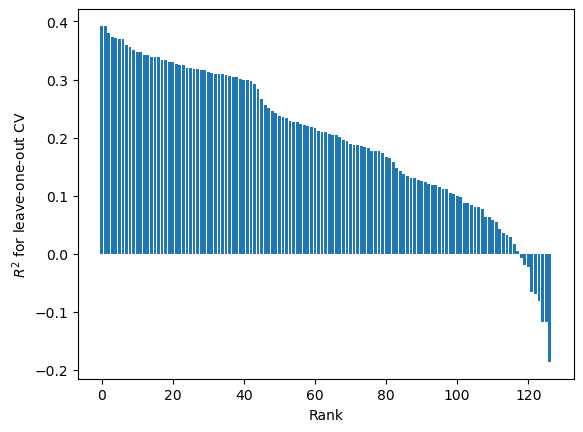

In [101]:
plt.bar(np.arange(len(R2_arr)), R2df['R2 LOO'])
plt.xlabel('Rank')
plt.ylabel('$R^2$ for leave-one-out CV')

0.5368298385734018


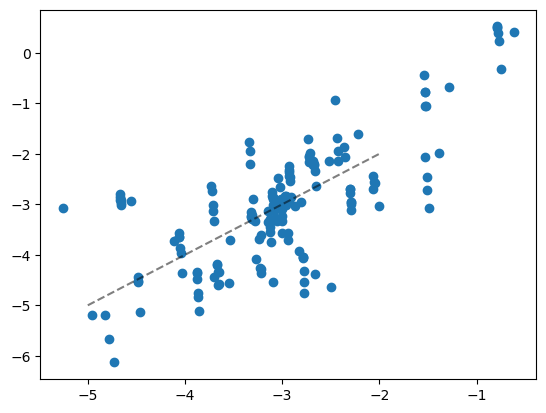

In [102]:
ypreds = []
for i, idx in enumerate(tmp.index):
    linear_reg = LinearRegression(fit_intercept = True).fit(np.array(tmp[columns].drop(idx)),y.drop(idx))
    Xi = np.array(tmp.loc[idx, columns]).reshape(1,-1)
    ypreds.append(linear_reg.predict(Xi)[0])

plt.scatter(ypreds, y)
l = np.linspace(-5,-2)
plt.plot(l,l,c='k',ls = '--', alpha = 0.5)

SSres = np.sum((ypreds-y)**2)
SStot = np.sum((y-np.mean(y))**2)
R2 = 1-(SSres/SStot)
print(R2)

In [ ]:
Xi

In [ ]:
X = sm.add_constant(tmp[columns])
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

In [ ]:
plt.scatter(res.predict(), y)
ypreds = res.predict()
SSres = np.sum((ypreds-y)**2)
SStot = np.sum((y-np.mean(y))**2)
R2 = 1-(SSres/SStot)
print(R2)

In [ ]:
X = sm.add_constant(StandardScaler().fit_transform(tmp[columns]))
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

In [ ]:
np.log10

In [ ]:
N = 100
coefficients = np.zeros((2,N))*np.nan

R2_arr_oo = np.zeros(N)
R2_arr = np.zeros(N)
R2_arr_test = np.zeros(N)
# data = StandardScaler().fit_transform(tmp[columns])
data = sm.add_constant(tmp[columns])

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.05)#, random_state=40)
    linear_reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)
    coefficients[:, i] = linear_reg.coef_
    R2_arr[i] = linear_reg.score(X_train, y_train)
    R2_arr_oo[i] = linear_reg.score(X_test, y_test)

plt.barh(columns, coefficients.mean(axis=1), xerr = coefficients.std(axis=1))
plt.show()

In [ ]:
X_test.shape

In [ ]:
fig, ax = plt.subplots(1)
ax.bar(["R2 within sample", "R2 out of sample"], [R2_arr.mean(), R2_arr_oo.mean()], yerr = [R2_arr.std(), R2_arr_oo.std()])
ax.set_ylim(-1, 1)
plt.show()

In [ ]:
dft = df.loc[df.Time==6.5, :]
tmp = dft.loc[~dft.isna().any(axis =1),:]
y = tmp['log10(leakage [mmol/gDW/h])']
X = tmp['Shadow price [gDW/mmol]']


In [ ]:
X = np.array(X).reshape(-1,1)
# x = np.array(y).reshape(-1,1)

In [ ]:
lr = linear_model.LinearRegression(fit_intercept = True)
ransac = linear_model.RANSACRegressor()

In [ ]:
lr.fit(X,y)
ransac.fit(X,y)

In [ ]:
line_X = np.linspace(X.min(), X.max(), 10)[:, np.newaxis]

In [ ]:
y1 = lr.predict(line_X)
y2 = ransac.predict(line_X)

In [ ]:
plt.scatter(X,y)
plt.plot(line_X, y1, label = 'Linear regression')
plt.plot(line_X, y2, label = 'Ransac')
plt.legend()

In [ ]:
y1